# Source 
https://www.youtube.com/watch?v=a339Q5F48UQ

In [ ]:
#Array packages
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4
from dask.distributed import Client

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy

In [5]:
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())

E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [7]:
xr.open_mfdataset('DATA_r/1_Model simulation/MERRA2/198001/LIS_HIST_198001020000.d01.nc')

<xarray.Dataset> Size: 8MB
Dimensions:           (north_south: 320, east_west: 300, time: 1,
                       SoilMoist_profiles: 4)
Coordinates:
  * time              (time) datetime64[ns] 8B 1980-01-02
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables: (12/19)
    lat               (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    lon               (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    Swnet_tavg        (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    Lwnet_tavg        (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    Qle_tavg          (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    Qh_tavg           (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    ...                ...
    SnowDepth_inst    (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    SoilMoist_tavg    (SoilMoist_profiles, north_south, east_west) float32 2MB dask.array<chunksize=(4, 320, 300), meta=np.ndarray>
    WaterTableD_tavg  (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    TWS_tavg          (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    GWS_tavg          (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
    TotalPrecip_tavg  (north_south, east_west) float32 384kB dask.array<chunksize=(320, 300), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [0.1 0.3 0.6 1. ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  
    ...                      ...
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   5.55
    SOUTH_WEST_CORNER_LON:   68.05
    DX:                      0.1
    DY:                      0.1

In [3]:
#Root directory
base='/home/civil/irdstaff/ird600406/'

In [16]:
a=xr.open_mfdataset(base+"Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/LIS_1980.nc", combine='by_coords',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

b=xr.open_mfdataset(base+"Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/198001/LIS_HIST_198001020000.d01.nc")


<xarray.Dataset>
Dimensions:           (north_south: 320, east_west: 300, time: 1,
                       SoilMoist_profiles: 4)
Coordinates:
  * time              (time) datetime64[ns] 1980-01-02
Dimensions without coordinates: north_south, east_west, SoilMoist_profiles
Data variables: (12/19)
    lat               (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    lon               (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    Swnet_tavg        (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    Lwnet_tavg        (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    Qle_tavg          (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    Qh_tavg           (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    ...                ...
    SnowDepth_inst    (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    SoilMoist_tavg    (SoilMoist_profiles, north_south, east_west) float32 dask.array<chunksize=(4, 320, 300), meta=np.ndarray>
    WaterTableD_tavg  (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    TWS_tavg          (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    GWS_tavg          (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
    TotalPrecip_tavg  (north_south, east_west) float32 dask.array<chunksize=(320, 300), meta=np.ndarray>
Attributes: (12/15)
    missing_value:           -9999.0
    NUM_SOIL_LAYERS:         4
    SOIL_LAYER_THICKNESSES:  [0.1 0.3 0.6 1. ]
    title:                   LIS land surface model output
    institution:             NASA GSFC
    source:                  
    ...                      ...
    comment:                 website: http://lis.gsfc.nasa.gov/
    MAP_PROJECTION:          EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:   5.55
    SOUTH_WEST_CORNER_LON:   68.05
    DX:                      0.1
    DY:                      0.1

In [17]:
lsm_fl=sorted(glob.glob(base+"Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/1980"+"*/LIS_HIST*"))
lsm = xr.open_mfdataset(lsm_fl, combine='by_coords',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

# DataPreprocessing

In [ ]:
## Reading & mergiInput/Merra2ng netcdfs from a folder

fdr=os.listdir(base)


year=np.arange(1980,2023,1)
lsm_fl_list=[]
for yr in tqdm(year):
    lsm_fl=sorted(glob.glob(base+"Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/"+str(yr)+"*/LIS_HIST*"))
    lsm_fl_list.append(lsm_fl)
    
    ProgressBar().register()
    lsm = xr.open_mfdataset(lsm_fl, combine='by_coords',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
    lsm1 = reformat_LIS_outputs(lsm)
    
    with dask.diagnostics.ProgressBar():
        lsm1_year_M = lsm1.resample(time='1M').mean()
        lsm1_year_M.to_netcdf('/home/civil/irdstaff/ird600406/Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/LIS_'+ str(yr) + '.nc')
    
    del lsm1
    del lsm1_year_M
    del lsm
    del lsm_fl
    
#merging the montly data of every year
lsm_yr_fl=sorted(glob.glob(base+"/LIS*.nc"))
lsm_yr = xr.open_mfdataset(lsm_yr_fl, combine='by_coords',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm_yr.to_netcdf('/home/civil/irdstaff/ird600406/Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/LIS_1980_2021_M.nc')   

  0%|                                                                                                                 | 0/43 [00:00<?, ?it/s]

[########################################] | 100% Completed | 20.3s
[########################################] | 100% Completed | 57.6s
[########################################] | 100% Completed | 57.7s


  2%|██▍                                                                                                    | 1/43 [01:29<1:02:36, 89.44s/it]

[########################################] | 100% Completed | 20.1s
[########################################] | 100% Completed | 20.2s
[########################################] | 100% Completed |  1min  2.4s
[########################################] | 100% Completed |  1min  2.5s
[########################################] | 100% Completed |  1min  2.6s


  5%|████▊                                                                                                  | 2/43 [03:03<1:02:54, 92.06s/it]

[########################################] | 100% Completed | 38.5s
[########################################] | 100% Completed | 38.6s
[########################################] | 100% Completed | 38.7s
[########################################] | 100% Completed |  1min  7.5s
[########################################] | 100% Completed |  1min  7.6s
[########################################] | 100% Completed |  1min  7.7s
[########################################] | 100% Completed |  1min  7.8s


  7%|███████                                                                                               | 3/43 [05:01<1:09:15, 103.89s/it]

[########################################] | 100% Completed | 38.2s
[########################################] | 100% Completed | 38.3s
[########################################] | 100% Completed | 38.4s
[########################################] | 100% Completed | 38.5s
[########################################] | 100% Completed |  1min 12.2s
[########################################] | 100% Completed |  1min 12.3s
[########################################] | 100% Completed |  1min 12.4s
[########################################] | 100% Completed |  1min 12.5s
[########################################] | 100% Completed |  1min 12.5s


  9%|█████████▍                                                                                            | 4/43 [07:03<1:12:15, 111.17s/it]

[########################################] | 100% Completed | 38.6s
[########################################] | 100% Completed | 38.7s
[########################################] | 100% Completed | 38.8s
[########################################] | 100% Completed | 38.8s
[########################################] | 100% Completed | 38.9s
[########################################] | 100% Completed |  1min 16.2s
[########################################] | 100% Completed |  1min 16.3s
[########################################] | 100% Completed |  1min 16.4s
[########################################] | 100% Completed |  1min 16.4s
[########################################] | 100% Completed |  1min 16.5s
[########################################] | 100% Completed |  1min 16.5s


 12%|███████████▊                                                                                          | 5/43 [09:10<1:13:58, 116.80s/it]

[########################################] | 100% Completed | 39.6s
[########################################] | 100% Completed | 39.7s
[########################################] | 100% Completed | 39.8s
[########################################] | 100% Completed | 39.8s
[########################################] | 100% Completed | 39.9s
[########################################] | 100% Completed | 39.9s
[########################################] | 100% Completed |  1min 21.9s
[########################################] | 100% Completed |  1min 22.0s
[########################################] | 100% Completed |  1min 22.1s
[########################################] | 100% Completed |  1min 22.2s
[########################################] | 100% Completed |  1min 22.3s
[########################################] | 100% Completed |  1min 22.3s
[########################################] | 100% Completed |  1min 22.4s


 14%|██████████████▏                                                                                       | 6/43 [11:24<1:15:35, 122.59s/it]

[########################################] | 100% Completed | 40.8s
[########################################] | 100% Completed | 40.9s
[########################################] | 100% Completed | 41.0s
[########################################] | 100% Completed | 41.1s
[########################################] | 100% Completed | 41.2s
[########################################] | 100% Completed | 41.3s
[########################################] | 100% Completed | 41.3s
[########################################] | 100% Completed |  1min 25.6s
[########################################] | 100% Completed |  1min 25.7s
[########################################] | 100% Completed |  1min 25.8s
[########################################] | 100% Completed |  1min 25.8s
[########################################] | 100% Completed |  1min 25.9s
[########################################] | 100% Completed |  1min 25.9s
[########################################] | 100% Completed |  1min 25.9s
[#####

 16%|████████████████▌                                                                                     | 7/43 [13:42<1:16:38, 127.73s/it]

[########################################] | 100% Completed | 42.7s
[########################################] | 100% Completed | 42.8s
[########################################] | 100% Completed | 42.9s
[########################################] | 100% Completed | 43.0s
[########################################] | 100% Completed | 43.1s
[########################################] | 100% Completed | 43.2s
[########################################] | 100% Completed | 43.3s
[########################################] | 100% Completed | 43.4s
[########################################] | 100% Completed |  1min 30.3s
[########################################] | 100% Completed |  1min 30.4s
[########################################] | 100% Completed |  1min 30.5s
[########################################] | 100% Completed |  1min 30.6s
[########################################] | 100% Completed |  1min 30.6s
[########################################] | 100% Completed |  1min 30.7s
[###########

 19%|██████████████████▉                                                                                   | 8/43 [16:07<1:17:46, 133.33s/it]

[########################################] | 100% Completed | 43.1s
[########################################] | 100% Completed | 43.2s
[########################################] | 100% Completed | 43.3s
[########################################] | 100% Completed | 43.3s
[########################################] | 100% Completed | 43.3s
[########################################] | 100% Completed | 43.4s
[########################################] | 100% Completed | 43.5s
[########################################] | 100% Completed | 43.6s
[########################################] | 100% Completed | 43.7s
[########################################] | 100% Completed |  1min 37.3s
[########################################] | 100% Completed |  1min 37.4s
[########################################] | 100% Completed |  1min 37.4s
[########################################] | 100% Completed |  1min 37.5s
[########################################] | 100% Completed |  1min 37.5s
[#################

 21%|█████████████████████▎                                                                                | 9/43 [18:40<1:19:01, 139.45s/it]

[########################################] | 100% Completed | 42.3s
[########################################] | 100% Completed | 42.4s
[########################################] | 100% Completed | 42.5s
[########################################] | 100% Completed | 42.6s
[########################################] | 100% Completed | 42.6s
[########################################] | 100% Completed | 42.7s
[########################################] | 100% Completed | 42.8s
[########################################] | 100% Completed | 42.9s
[########################################] | 100% Completed | 43.0s
[########################################] | 100% Completed | 43.1s
[########################################] | 100% Completed |  1min 43.5s
[########################################] | 100% Completed |  1min 43.6s
[########################################] | 100% Completed |  1min 43.6s
[########################################] | 100% Completed |  1min 43.7s
[#######################

 23%|███████████████████████▍                                                                             | 10/43 [21:19<1:19:55, 145.32s/it]

[########################################] | 100% Completed | 43.3s
[########################################] | 100% Completed | 43.4s
[########################################] | 100% Completed | 43.5s
[########################################] | 100% Completed | 43.6s
[########################################] | 100% Completed | 43.7s
[########################################] | 100% Completed | 43.7s
[########################################] | 100% Completed | 43.8s
[########################################] | 100% Completed | 43.9s
[########################################] | 100% Completed | 44.0s
[########################################] | 100% Completed | 44.1s
[########################################] | 100% Completed | 44.2s
[########################################] | 100% Completed |  1min 51.8s
[########################################] | 100% Completed |  1min 51.9s
[########################################] | 100% Completed |  1min 52.0s
[#############################

 26%|█████████████████████████▊                                                                           | 11/43 [24:07<1:21:14, 152.34s/it]

[########################################] | 100% Completed | 45.1s
[########################################] | 100% Completed | 45.2s
[########################################] | 100% Completed | 45.3s
[########################################] | 100% Completed | 45.4s
[########################################] | 100% Completed | 45.5s
[########################################] | 100% Completed | 45.6s
[########################################] | 100% Completed | 45.7s
[########################################] | 100% Completed | 45.8s
[########################################] | 100% Completed | 45.9s
[########################################] | 100% Completed | 45.9s
[########################################] | 100% Completed | 46.0s
[########################################] | 100% Completed | 46.1s
[########################################] | 100% Completed |  1min 58.4s
[########################################] | 100% Completed |  1min 58.4s
[###################################

 28%|████████████████████████████▏                                                                        | 12/43 [27:03<1:22:26, 159.55s/it]

[########################################] | 100% Completed | 45.8s
[########################################] | 100% Completed | 45.9s
[########################################] | 100% Completed | 46.0s
[########################################] | 100% Completed | 46.1s
[########################################] | 100% Completed | 46.2s
[########################################] | 100% Completed | 46.3s
[########################################] | 100% Completed | 46.4s
[########################################] | 100% Completed | 46.5s
[########################################] | 100% Completed | 46.6s
[########################################] | 100% Completed | 46.7s
[########################################] | 100% Completed | 46.8s
[########################################] | 100% Completed | 46.9s
[########################################] | 100% Completed | 47.0s
[########################################] | 100% Completed |  2min  3.6s
[########################################]

 30%|██████████████████████████████▌                                                                      | 13/43 [30:05<1:23:11, 166.38s/it]

[########################################] | 100% Completed | 46.2s
[########################################] | 100% Completed | 46.3s
[########################################] | 100% Completed | 46.4s
[########################################] | 100% Completed | 46.5s
[########################################] | 100% Completed | 46.6s
[########################################] | 100% Completed | 46.7s
[########################################] | 100% Completed | 46.8s
[########################################] | 100% Completed | 46.9s
[########################################] | 100% Completed | 47.0s
[########################################] | 100% Completed | 47.1s
[########################################] | 100% Completed | 47.2s
[########################################] | 100% Completed | 47.3s
[########################################] | 100% Completed | 47.4s
[########################################] | 100% Completed | 47.5s
[########################################] | 100

 33%|████████████████████████████████▉                                                                    | 14/43 [33:12<1:23:28, 172.71s/it]

[########################################] | 100% Completed | 47.8s
[########################################] | 100% Completed | 47.9s
[########################################] | 100% Completed | 48.0s
[########################################] | 100% Completed | 48.1s
[########################################] | 100% Completed | 48.2s
[########################################] | 100% Completed | 48.3s
[########################################] | 100% Completed | 48.4s
[########################################] | 100% Completed | 48.5s
[########################################] | 100% Completed | 48.6s
[########################################] | 100% Completed | 48.6s
[########################################] | 100% Completed | 48.7s
[########################################] | 100% Completed | 48.7s
[########################################] | 100% Completed | 48.8s
[########################################] | 100% Completed | 48.8s
[########################################] | 100

 35%|███████████████████████████████████▏                                                                 | 15/43 [36:29<1:23:55, 179.85s/it]

[########################################] | 100% Completed | 48.7s
[########################################] | 100% Completed | 48.8s
[########################################] | 100% Completed | 48.9s
[########################################] | 100% Completed | 49.0s
[########################################] | 100% Completed | 49.1s
[########################################] | 100% Completed | 49.2s
[########################################] | 100% Completed | 49.3s
[########################################] | 100% Completed | 49.4s
[########################################] | 100% Completed | 49.5s
[########################################] | 100% Completed | 49.6s
[########################################] | 100% Completed | 49.7s
[########################################] | 100% Completed | 49.8s
[########################################] | 100% Completed | 49.9s
[########################################] | 100% Completed | 50.0s
[########################################] | 100

 37%|█████████████████████████████████████▌                                                               | 16/43 [39:54<1:24:24, 187.58s/it]

[########################################] | 100% Completed | 49.3s
[########################################] | 100% Completed | 49.4s
[########################################] | 100% Completed | 49.5s
[########################################] | 100% Completed | 49.6s
[########################################] | 100% Completed | 49.7s
[########################################] | 100% Completed | 49.8s
[########################################] | 100% Completed | 49.9s
[########################################] | 100% Completed | 50.0s
[########################################] | 100% Completed | 50.1s
[########################################] | 100% Completed | 50.1s
[########################################] | 100% Completed | 50.2s
[########################################] | 100% Completed | 50.3s
[########################################] | 100% Completed | 50.4s
[########################################] | 100% Completed | 50.5s
[########################################] | 100

 40%|███████████████████████████████████████▉                                                             | 17/43 [43:30<1:24:55, 195.97s/it]

[########################################] | 100% Completed | 51.2s
[########################################] | 100% Completed | 51.3s
[########################################] | 100% Completed | 51.4s
[########################################] | 100% Completed | 51.5s
[########################################] | 100% Completed | 51.6s
[########################################] | 100% Completed | 51.7s
[########################################] | 100% Completed | 51.8s
[########################################] | 100% Completed | 51.8s
[########################################] | 100% Completed | 51.9s
[########################################] | 100% Completed | 52.0s
[########################################] | 100% Completed | 52.1s
[########################################] | 100% Completed | 52.2s
[########################################] | 100% Completed | 52.2s
[########################################] | 100% Completed | 52.3s
[########################################] | 100

 42%|██████████████████████████████████████████▎                                                          | 18/43 [47:19<1:25:46, 205.85s/it]

[########################################] | 100% Completed | 50.1s
[########################################] | 100% Completed | 50.2s
[########################################] | 100% Completed | 50.3s
[########################################] | 100% Completed | 50.4s
[########################################] | 100% Completed | 50.4s
[########################################] | 100% Completed | 50.5s
[########################################] | 100% Completed | 50.6s
[########################################] | 100% Completed | 50.6s
[########################################] | 100% Completed | 50.7s
[########################################] | 100% Completed | 50.8s
[########################################] | 100% Completed | 50.9s
[########################################] | 100% Completed | 50.9s
[########################################] | 100% Completed | 51.0s
[########################################] | 100% Completed | 51.0s
[########################################] | 100

 44%|████████████████████████████████████████████▋                                                        | 19/43 [51:13<1:25:46, 214.42s/it]

[########################################] | 100% Completed | 51.3s
[########################################] | 100% Completed | 51.4s
[########################################] | 100% Completed | 51.5s
[########################################] | 100% Completed | 51.6s
[########################################] | 100% Completed | 51.7s
[########################################] | 100% Completed | 51.8s
[########################################] | 100% Completed | 51.9s
[########################################] | 100% Completed | 51.9s
[########################################] | 100% Completed | 52.0s
[########################################] | 100% Completed | 52.1s
[########################################] | 100% Completed | 52.2s
[########################################] | 100% Completed | 52.3s
[########################################] | 100% Completed | 52.4s
[########################################] | 100% Completed | 52.5s
[########################################] | 100

 47%|██████████████████████████████████████████████▉                                                      | 20/43 [55:17<1:25:37, 223.39s/it]

[########################################] | 100% Completed | 52.6s
[########################################] | 100% Completed | 52.7s
[########################################] | 100% Completed | 52.8s
[########################################] | 100% Completed | 52.9s
[########################################] | 100% Completed | 52.9s
[########################################] | 100% Completed | 53.0s
[########################################] | 100% Completed | 53.1s
[########################################] | 100% Completed | 53.2s
[########################################] | 100% Completed | 53.3s
[########################################] | 100% Completed | 53.4s
[########################################] | 100% Completed | 53.5s
[########################################] | 100% Completed | 53.6s
[########################################] | 100% Completed | 53.7s
[########################################] | 100% Completed | 53.8s
[########################################] | 100

 63%|██████████████████████████████████████████████████████████████▏                                    | 27/43 [1:30:04<1:23:05, 311.62s/it]

[####################                    ] | 51% Completed |  2min 23.2s

## Clipping to Indian file

In [3]:
#base+'Research/Data/1_Simulations/LIS_MERRA2/SURFACEMODEL/LIS_1980_2021_M.nc
lsm_M = xr.open_dataset('input/MERRA2/LIS_1980_2021_M.nc')
#lsm_M=clipping(lsm_M)

## Runoff efficiency calculation

In [4]:
#1.Equation
RE=lsm_M["Qs_tavg"]/lsm_M["TotalPrecip_tavg"]
ds=RE

In [11]:
a=RE.sel(lat=slice(26,30),lon=slice(92,97))
idx=np.where((a.values>100))
x,y,z = idx
for xi, yi, zi in zip(x, y, z):
        print(f"Value 1000 found at indices (x, y, z): ({xi}, {yi}, {zi})")

Value 1000 found at indices (x, y, z): (11, 8, 27)
Value 1000 found at indices (x, y, z): (11, 9, 28)
Value 1000 found at indices (x, y, z): (11, 13, 0)
Value 1000 found at indices (x, y, z): (11, 13, 1)
Value 1000 found at indices (x, y, z): (11, 14, 0)
Value 1000 found at indices (x, y, z): (11, 14, 2)
Value 1000 found at indices (x, y, z): (11, 14, 3)
Value 1000 found at indices (x, y, z): (11, 14, 4)
Value 1000 found at indices (x, y, z): (11, 14, 5)
Value 1000 found at indices (x, y, z): (11, 14, 6)
Value 1000 found at indices (x, y, z): (11, 15, 0)
Value 1000 found at indices (x, y, z): (11, 15, 2)
Value 1000 found at indices (x, y, z): (11, 15, 3)
Value 1000 found at indices (x, y, z): (11, 15, 4)
Value 1000 found at indices (x, y, z): (11, 15, 5)
Value 1000 found at indices (x, y, z): (11, 15, 6)
Value 1000 found at indices (x, y, z): (11, 15, 7)
Value 1000 found at indices (x, y, z): (11, 15, 8)
Value 1000 found at indices (x, y, z): (11, 16, 1)
Value 1000 found at indices (x,

# 2 Preliminary analysis

In [28]:
# so Many data points show enourmous value of runoff efficiency (>1), even greater than 10^5. So it will affect the results, especially
# When calculating mean
idx=np.where((RE.values>1000000000000))
x,y,z = idx
for xi, yi, zi in zip(x, y, z):
        print(f"Value 1000 found at indices (x, y, z): ({xi}, {yi}, {zi})")

Value 1000 found at indices (x, y, z): (340, 165, 11)
Value 1000 found at indices (x, y, z): (340, 166, 10)
Value 1000 found at indices (x, y, z): (340, 167, 10)
Value 1000 found at indices (x, y, z): (340, 167, 11)
Value 1000 found at indices (x, y, z): (340, 168, 10)
Value 1000 found at indices (x, y, z): (340, 168, 11)
Value 1000 found at indices (x, y, z): (340, 174, 10)
Value 1000 found at indices (x, y, z): (340, 174, 11)
Value 1000 found at indices (x, y, z): (340, 175, 9)
Value 1000 found at indices (x, y, z): (340, 175, 10)
Value 1000 found at indices (x, y, z): (340, 175, 11)
Value 1000 found at indices (x, y, z): (340, 176, 9)
Value 1000 found at indices (x, y, z): (340, 176, 10)
Value 1000 found at indices (x, y, z): (340, 176, 11)
Value 1000 found at indices (x, y, z): (340, 177, 9)
Value 1000 found at indices (x, y, z): (340, 177, 10)
Value 1000 found at indices (x, y, z): (340, 177, 11)
Value 1000 found at indices (x, y, z): (340, 177, 12)
Value 1000 found at indices (x,

In [30]:
#inconsistent dimensions
#1. 466,189,140 (RE-95)
#2  442, 209, 107

#ds.isel(time=442,lat=209,lon=107).values
#lsm_M["Qs_tavg"].isel(time=466,lat=189,lon=140).values
lsm_M["TotalPrecip_tavg"].isel(time=466,lat=189,lon=140).values

array(8.202919e-10, dtype=float32)

## Mean of RE vs ratio of individual means of ppt, runoff

C:\Users\sstar\AppData\Local\Temp\ipykernel_31460\1502306481.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)
C:\Users\sstar\AppData\Local\Temp\ipykernel_31460\1502306481.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)
C:\Users\sstar\AppData\Local\Temp\ipykernel_31460\1502306481.py:56: MatplotlibDeprecationWarning: Unable to de

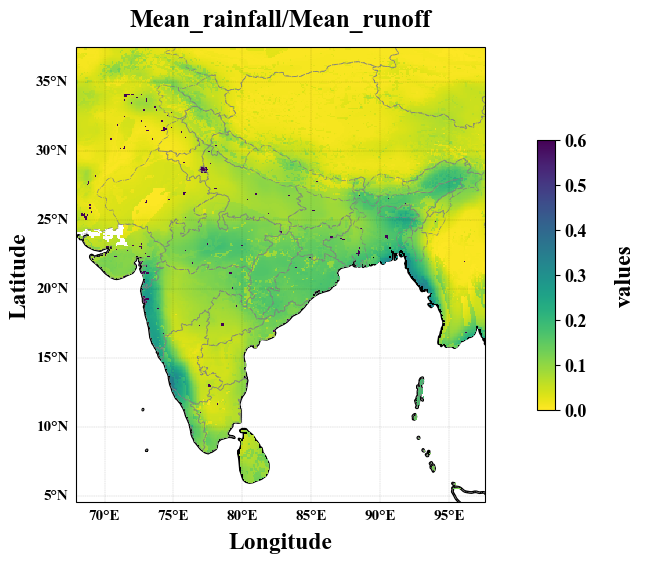

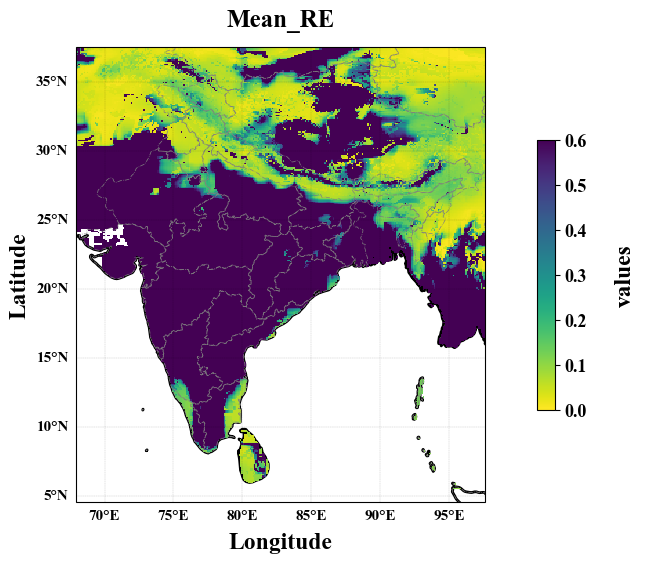

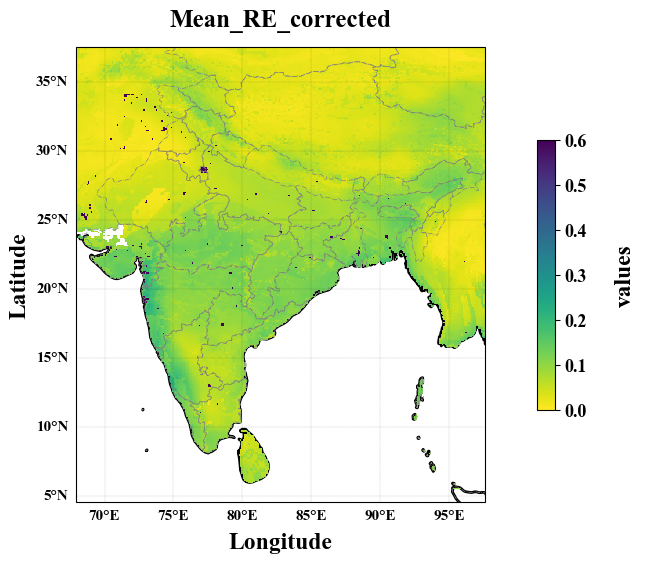

In [56]:
#1 seperate mean of component
Map_plot(lsm_M["Qs_tavg"].mean(dim="time")/lsm_M["TotalPrecip_tavg"].mean(dim="time"),0,0.6,'Mean_rainfall/Mean_runoff','values')
plt.savefig('output/0_preliminary/Average.png')

#2 mean of RE
Map_plot(RE.mean(dim="time"),0,0.6,'Mean_RE','values')
#plt.show()
plt.savefig('output/0_preliminary/Mean_RE.png')

#3 mean of corrected RE
RE_c=RE.where(RE<1)
Map_plot(RE_c.mean(dim="time"),0,0.6,'Mean_RE_corrected','values')
#plt.show()
plt.savefig('output/0_preliminary/Mean_RE_c.jpeg')

plt.show()

C:\Users\sstar\AppData\Local\Temp\ipykernel_31460\1502306481.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)


# Functions



In [5]:
def reformat_LIS_outputs(ncdat):
    """Reformats dimensions of LIS outputs for easier handling
    
    Parameters: 
        ncdat: LIS output xarray dataset with NS/EW dimensions
    Returns: 
        LIS output netCDF file with lat/lon dimensions
    """
    xmin=ncdat.attrs['SOUTH_WEST_CORNER_LON']
    ymin=ncdat.attrs['SOUTH_WEST_CORNER_LAT']
    dx=ncdat.attrs['DX']
    dy=ncdat.attrs['DY']
    nx=ncdat.dims['east_west']
    ny=ncdat.dims['north_south']

    lonarr=np.arange(xmin, xmin + dx * nx, dx) #Creates latitude array
    latarr=np.arange(ymin, ymin + dy * ny, dy) #Creates longitude array

    reformatted_ncdat=ncdat.rename({'north_south':'lat', 'east_west':'lon'}) 
    reformatted_ncdat=reformatted_ncdat.assign_coords({"lon": lonarr, 
                                                       "lat": latarr})
    
    return(reformatted_ncdat)

In [15]:
#function2: Clipping
def clipping(lsm_M):
    ind_shp = gpd.read_file("/home/civil/irdstaff/ird600406/Research/Data/2_shapefiles/India/India-States.shp")
    
    lsm_M.rio.set_spatial_dims(y_dim="lat",x_dim="lon", inplace=True)
    lsm_M.rio.write_crs("epsg:4326", inplace=True)
    lsm_M = lsm_M.rio.clip(ind_shp.geometry.apply(mapping), ind_shp.crs, drop=True)
    
    return(lsm_M)

In [38]:
#function3 - plot
def Map_plot(xrr,vmin1,vmax1,plt_tit,cbar_tit):

    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.io.shapereader import Reader
    from cartopy.feature import ShapelyFeature
    import geopandas as gpd

    import matplotlib
    from matplotlib.colors import LinearSegmentedColormap
    from matplotlib.cm import ScalarMappable
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    
    matplotlib.rcParams.update({'font.family': 'Times New Roman', 'font.size': 17, 'font.weight': 'bold'})

    
    fig = plt.figure(figsize=(7,7))
    axes = plt.axes(projection=ccrs.PlateCarree())
    axes.set_extent([67.90, 97.59, 4.5, 37.50], ccrs.PlateCarree())

    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=.15, color='black', alpha=0.5, linestyle='-.')
    gl.xlabel_style = {"size" : 11,'family': 'Times New Roman'}
    gl.ylabel_style = {"size" : 11,'family': 'Times New Roman'}
    gl.top_labels = False
    gl.right_labels = False

    # Set a custom x-axis label
    axes.text(0.5, -0.1, 'Longitude', transform=axes.transAxes, ha='center')            #fontfamily,fontsize, weight
    axes.text(-0.16, 0.5, 'Latitude', transform=axes.transAxes,
             va='center', rotation='vertical')

    #PLOT
    cmap1='viridis_r'
    #xrr.plot.contourf(vmin=vmin1,vmax=vmax1 ,ax=axes, cmap=cmap1, add_labels=False, add_colorbar=False) #vector
    xrr.plot.imshow(vmin=vmin1,vmax=vmax1 ,ax=axes, cmap=cmap1, add_labels=False, add_colorbar=False) #pixeleted


    #shape_feature = ShapelyFeature(Reader('input/shapefile/India-States.shp').geometries(), ccrs.PlateCarree(), linewidth=1.5, facecolor='none', edgecolor='black')
    #axes.add_feature(shape_feature)
    axes.add_feature(cfeature.OCEAN, facecolor="white", edgecolor='black',)
    axes.add_feature(cfeature.LAND, linewidth=2, facecolor='white', edgecolor='black')
    axes.set_facecolor(None)
    axes.add_feature(cfeature.STATES, zorder=1, linewidth=.51, edgecolor='grey', linestyle='-.')


    #colourbar...it can be give either as an argument cbar_kwargs directly to contourf or using mappable
      #cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}

    cmap=cmap1
    sm1 = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
    cbar=plt.colorbar(sm1,orientation="vertical", shrink=0.5, pad=.095, aspect=15, label = cbar_tit)
    cbar.ax.tick_params(axis='both', labelsize=13) 
    cbar.ax.yaxis.labelpad = 20

    plt.title(plt_tit,fontsize=18,pad=15,fontname='Times New Roman',weight='bold')
    
    #plt.show()
    #plt.savefig('output/1_Trendanalysis/Slope.png')
   

## Trial tests

In [10]:
# Test to check the result of division of two xarrays
#lsm_M.Qs_tvg.sel(time="2013")
A=lsm_M.sel(lat=slice(19.5,20),lon=slice(76.5, 77),time="2001-01") 
A=A*10000000
A_Q=A["Qs_tavg"]
A_P=A["TotalPrecip_tavg"]
N=A_Q/A_P
print(N.values)
print((A["Qs_tavg"].isel(lat=4,lon=4)/ A["TotalPrecip_tavg"].isel(lat=4,lon=4)).values)

[[[0.05655509 0.05636079 0.05618605 0.05605879 0.05596178]
  [0.05641214 0.06086777 0.06079298 0.06070352 0.06064938]
  [0.05623262 0.0608187  0.0607136  0.06061444 0.06054537]
  [0.05605124 0.05582862 0.05564471 0.05548886 0.05537059]
  [0.0558693  0.0556344  0.05542044 0.05526229 0.05515579]]]
[0.05515579]


In [18]:
# Testing the unit for a lat,lon location in kerala durin june
A=lsm_M["TotalPrecip_tavg"]*30*86400
B=lsm_M["Qs_tavg"]*30*86400
print(A.sel(lat=11,lon=76,time="2018-07",method="nearest").values)
print(B.sel(lat=11,lon=76,time="2018-07",method="nearest").values)

411.9007632136345
22.745204530656338


In [82]:

print(A["Qs_tavg"].isel(lat=0,lon=4).values)


[[[3.35442451 3.54173011 3.71884965 3.86790163 3.9813628 ]
  [3.50465257 4.00730073 4.21618381 4.38828636 4.51942185]
  [3.65209161 4.18592805 4.40166644 4.57931776 4.71248683]
  [3.79689055 4.00737719 4.20658012 4.3695016  4.48912374]
  [3.9347475  4.15059844 4.35280299 4.51818039 4.63812626]]]
[3.9813628]


<xarray.DataArray (time: 1)>
dask.array<truediv, shape=(1,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-31
    lat      float64 19.55
    lon      float64 76.55

[0.05515579]


In [61]:
#Trend analysis on runoff efficieny
RE_tr = RE.polyfit(dim = "time", deg = 1)
RE_tr
RE_tr.polyfit_coefficients.sel(degree=0).plot(cmap='viridis', vmin=-3,vmax=3)

array([0.05776145], dtype=float32)